In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [2]:
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf
from tensorflow.python.keras import regularizers

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
import keras

### Load the dataset

In [ ]:

import splitfolders # or import splitfolders
input_folder = "D:\DataSets\__MACOSX\Class Dataset IS3"
output = "D:\DataSets\Class_Dataset" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

In [4]:
train_dir = r"D:\DataSets\Class_Dataset\train"
test_dir = r"D:\DataSets\Class_Dataset\test"
val_dir = r"D:\DataSets\Class_Dataset\val"

In [5]:
train_datagen = ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') 

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_set = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),batch_size=8,color_mode="rgb",class_mode = 'categorical')
val_set = train_datagen.flow_from_directory(directory=val_dir,target_size=(224,224),batch_size=8,color_mode="rgb",class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),batch_size=8,color_mode="rgb",class_mode = 'categorical')

Found 600 images belonging to 15 classes.
Found 75 images belonging to 15 classes.
Found 75 images belonging to 15 classes.


In [52]:
classes = test_set.class_indices
print(classes)
y_classes = []
for i in classes.keys():
    y_classes.append(i)
    
print(y_classes)
    

{'Achal_Mate-samples': 0, 'Anushka_Hiray-samples': 1, 'Fawzaan-samples': 2, 'Lokesh-samples': 3, 'Pranav-samples': 4, 'Pushkar-samples': 5, 'Samarth-samples': 6, 'Sohail-samples': 7, 'Sumeet_Sapkal-samples': 8, 'Sunny-samples': 9, 'Susmit-samples': 10, 'Umang_Patel-samples': 11, 'Vaibhav-samples': 12, 'Vivek_Patil-samples': 13, 'Vivek_pusti-samples': 14}
['Achal_Mate-samples', 'Anushka_Hiray-samples', 'Fawzaan-samples', 'Lokesh-samples', 'Pranav-samples', 'Pushkar-samples', 'Samarth-samples', 'Sohail-samples', 'Sumeet_Sapkal-samples', 'Sunny-samples', 'Susmit-samples', 'Umang_Patel-samples', 'Vaibhav-samples', 'Vivek_Patil-samples', 'Vivek_pusti-samples']


In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3),activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.50))


model.add(Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 186624)           

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
batch_size = 5
no_epochs = 100
steps_per_epochs = no_epochs // batch_size

In [24]:
history = model.fit_generator(train_set,steps_per_epoch=steps_per_epochs,epochs=no_epochs,validation_data=val_set)

Epoch 1/100
20/20 [==============================] - 10s 479ms/step - loss: 0.8471 - accuracy: 0.0750 - val_loss: 0.7198 - val_accuracy: 0.1067
Epoch 2/100
20/20 [==============================] - 9s 451ms/step - loss: 0.2952 - accuracy: 0.0875 - val_loss: 0.6849 - val_accuracy: 0.1333
Epoch 3/100
20/20 [==============================] - 9s 475ms/step - loss: 0.2761 - accuracy: 0.0625 - val_loss: 0.7113 - val_accuracy: 0.0667
Epoch 4/100
20/20 [==============================] - 9s 472ms/step - loss: 0.2675 - accuracy: 0.1312 - val_loss: 0.7084 - val_accuracy: 0.0533
Epoch 5/100
20/20 [==============================] - 10s 507ms/step - loss: 0.2616 - accuracy: 0.1437 - val_loss: 0.7031 - val_accuracy: 0.1067
Epoch 6/100
20/20 [==============================] - 9s 475ms/step - loss: 0.2613 - accuracy: 0.1000 - val_loss: 0.7073 - val_accuracy: 0.0667
Epoch 7/100
20/20 [==============================] - 10s 512ms/step - loss: 0.2561 - accuracy: 0.1688 - val_loss: 0.7033 - val_accuracy: 0.1

In [25]:
model.save("face.h5")

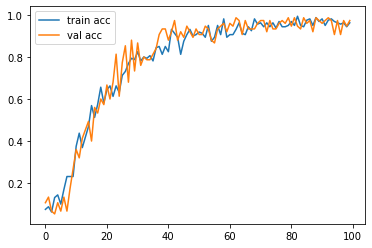

In [26]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('face-acc-rps-1.png')

plt.show()

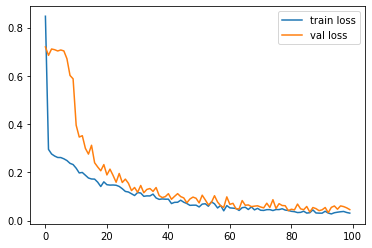

In [27]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('face-loss-rps-1.png')
plt.show()

In [31]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array 

In [1]:
path = r'D:\DataSets\Class_Dataset\test\Pushkar-narkheede-samples\22.jpg'
img = load_img(path, target_size=(224,224))
plt.imshow(img, cmap='gray')
plt.show()

x = img_to_array(img)
x = np.expand_dims(x, axis=0)


#images = np.vstack([x])
classes = model.predict(x)
print("Prediction is : ",y_classes[classes.argmax(axis=-1)[0]])

### Conclusion

1. Successfully Creation of custom dataset for face detection
2. Agumentented the custom dataset using ImageDataGenerator and train the CNN model with 96% accuracy